### Importing libaries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


### Loading the dataset

In [4]:
# Load the dataset (assuming it's a CSV file with columns 'email' and 'label')
data = pd.read_csv('spam.csv')

# Explore the dataset
print(data.head())
print(data['Category'].value_counts())


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Category
ham     4825
spam     747
Name: count, dtype: int64


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the email content using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf_vectorizer.fit_transform(data['Message'])

# Convert labels to binary (0 for not spam, 1 for spam)
y = data['Category'].map({'ham': 0, 'spam': 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1-Score: {f1_log_reg}, ROC-AUC: {roc_auc_log_reg}")


Logistic Regression - Accuracy: 0.95695067264574, Precision: 1.0, Recall: 0.6778523489932886, F1-Score: 0.808, ROC-AUC: 0.9883279836591771


In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-Score: {f1_rf}, ROC-AUC: {roc_auc_rf}")


Random Forest - Accuracy: 0.9811659192825112, Precision: 1.0, Recall: 0.8590604026845637, F1-Score: 0.9241877256317689, ROC-AUC: 0.9928682590631817


In [14]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# Evaluation
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1])

print(f"AdaBoost - Accuracy: {accuracy_ada}, Precision: {precision_ada}, Recall: {recall_ada}, F1-Score: {f1_ada}, ROC-AUC: {roc_auc_ada}")


AdaBoost - Accuracy: 0.9739910313901345, Precision: 0.9615384615384616, Recall: 0.8389261744966443, F1-Score: 0.896057347670251, ROC-AUC: 0.9810121305598399


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

print(f"KNN - Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}, F1-Score: {f1_knn}, ROC-AUC: {roc_auc_knn}")


KNN - Accuracy: 0.9103139013452914, Precision: 1.0, Recall: 0.3288590604026846, F1-Score: 0.494949494949495, ROC-AUC: 0.8050808009226451


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.956951   1.000000  0.677852  0.808000  0.988328
1        Random Forest  0.981166   1.000000  0.859060  0.924188  0.992868
2             AdaBoost  0.973991   0.961538  0.838926  0.896057  0.981012
3                  KNN  0.910314   1.000000  0.328859  0.494949  0.805081


NameError: name 'plt' is not defined

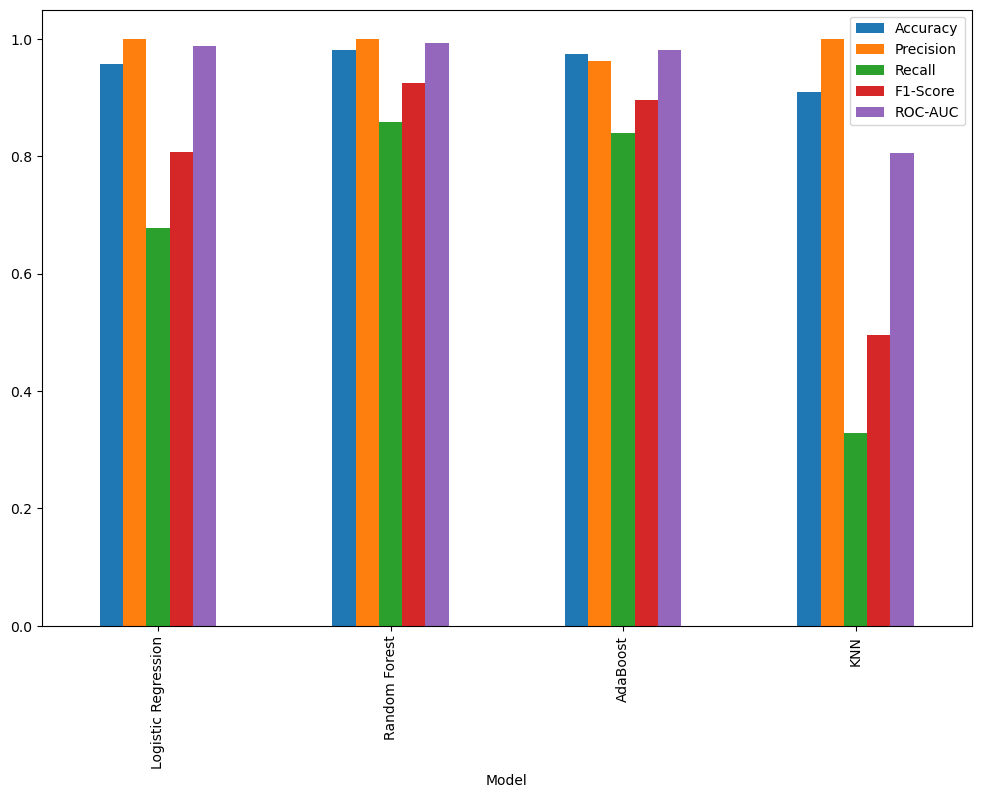

In [16]:
# Comparison of results
models = ['Logistic Regression', 'Random Forest', 'AdaBoost', 'KNN']
accuracies = [accuracy_log_reg, accuracy_rf, accuracy_ada, accuracy_knn]
precisions = [precision_log_reg, precision_rf, precision_ada, precision_knn]
recalls = [recall_log_reg, recall_rf, recall_ada, recall_knn]
f1_scores = [f1_log_reg, f1_rf, f1_ada, f1_knn]
roc_aucs = [roc_auc_log_reg, roc_auc_rf, roc_auc_ada, roc_auc_knn]

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores,
    'ROC-AUC': roc_aucs
})

print(results_df)

# Plot the performance of different models
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()
